In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as  pd
import sklearn
import os
import time
from tensorflow import keras
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

matplotlib 3.1.1
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
#导入数据
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test = train_test_split(housing.data,
                                                        housing.target,
                                                        random_state = 0)
x_train,x_valid,y_train,y_valid = train_test_split(x_train_all,
                                                  y_train_all,
                                                 random_state = 0)

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [11]:
#sklearn 超参数搜索
# 1.转化为sklearn的model
# 2. 定义超参数集合
# 3. 搜索参数
def build_model(hidden_layers =1,
                layer_size = 30,
                learning_rate = 3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size,
                                 activation="relu",
                                input_shape = x_train.shape[1:]))
    for _ in range(hidden_layers-1):
        model.add(keras.layers.Dense(layer_size,
                                    activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse",
                 optimizer = optimizer)
    return model

sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)


logdir = r'C:\Users\Xiaoi\Desktop\tensorflow2.0\hp_search_callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

_callbacks = [
    keras.callbacks.TensorBoard(logdir),#tensotBoard 路径
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only=True), #保存最好的模型
    keras.callbacks.EarlyStopping(patience=5,
                                 min_delta=1e-4) # 5轮之内，最低为1e-3 就停止
]

history = sklearn_model.fit(x_train_scaled,
                 y_train,
                 epochs = 100,
                 validation_data = (x_valid_scaled,y_valid),
                 callbacks = _callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 48us/sample - loss: 1.1395 - val_loss: 0.6175
Epoch 2/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5753 - val_loss: 0.5631
Epoch 3/100
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5213 - val_loss: 0.5028
Epoch 4/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4922 - val_loss: 0.4817
Epoch 5/100
11610/11610 [==============================] - 0s 34us/sample - loss: 0.4774 - val_loss: 0.4794
Epoch 6/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4633 - val_loss: 0.4617
Epoch 7/100
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4540 - val_loss: 0.4554
Epoch 8/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4468 - val_loss: 0.4521
Epoch 9/100
11610/11610 [==============================] - 0s 35us/sample - loss: 0.440

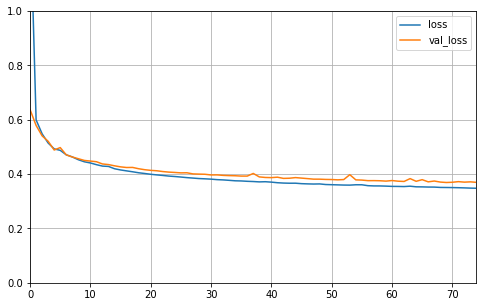

In [9]:
def plot_learning_curver(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curver(history)